<a href="https://colab.research.google.com/github/anjali0503/PROJECTS/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CIFAR-10
It has 60,000 color images comprising of 10 different classes. The image size is 32x32 and the dataset has 50,000 training images and 10,000 test images.

In [ ]:
from keras.datasets import cifar10 # keras is API from will download cifar10 dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
print('Traning data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)

Traning data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [ ]:
y_train.shape,y_test.shape

((50000, 1), (10000, 1))

In [ ]:
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [ ]:
label_dict = {0: 'airplane',1: 'automobile', 2: 'bird',3: 'cat',4: 'deer',5: 'dog',6: 'frog',7: 'horse', 8: 'ship',9: 'truck'}

In [ ]:
label_dict

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

Text(0.5, 1.0, '(Label: frog)')


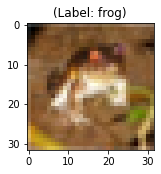

In [ ]:
plt.figure(figsize=[5,5]) # to set figure size 
plt.subplot(121) # 121 is figure number
curr_img = np.reshape(x_train[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_train[0][0]]) + ")"))

Text(0.5, 1.0, '(Label: cat)')


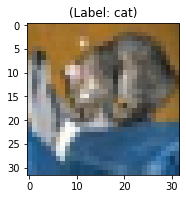

In [ ]:
# test
plt.subplot(122)
curr_img = np.reshape(x_test[0],(32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_test[0][0]]) + ")"))

In [ ]:
np.min(x_train),np.max(x_train)
x_train = x_train/255.0
np.min(x_train),np.max(x_train)
x_train_flat = x_train.reshape(-1,3072)
feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]

In [ ]:
df_cifar = pd.DataFrame(x_train_flat,columns=feat_cols)

In [ ]:
df_cifar

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel3032,pixel3033,pixel3034,pixel3035,pixel3036,pixel3037,pixel3038,pixel3039,pixel3040,pixel3041,pixel3042,pixel3043,pixel3044,pixel3045,pixel3046,pixel3047,pixel3048,pixel3049,pixel3050,pixel3051,pixel3052,pixel3053,pixel3054,pixel3055,pixel3056,pixel3057,pixel3058,pixel3059,pixel3060,pixel3061,pixel3062,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071
0,1.395376e-08,1.466327e-08,1.489978e-08,1.016969e-08,1.087920e-08,1.064270e-08,1.182522e-08,1.135221e-08,1.016969e-08,1.608230e-08,1.277124e-08,9.933186e-09,2.317743e-08,1.726482e-08,1.229823e-08,2.814403e-08,2.152190e-08,1.489978e-08,3.287412e-08,2.530597e-08,1.773783e-08,3.429314e-08,2.601549e-08,1.892035e-08,3.523916e-08,2.767102e-08,2.104889e-08,3.523916e-08,2.838053e-08,2.199491e-08,3.098208e-08,2.435996e-08,1.821084e-08,2.956305e-08,2.341394e-08,1.797434e-08,3.358363e-08,2.719801e-08,2.152190e-08,3.405664e-08,...,1.962987e-08,3.500266e-08,2.435996e-08,1.821084e-08,3.807721e-08,2.483297e-08,1.631881e-08,3.405664e-08,2.246792e-08,1.300774e-08,2.648850e-08,2.128540e-08,1.395376e-08,2.814403e-08,2.152190e-08,1.371726e-08,3.074558e-08,2.270443e-08,1.537279e-08,2.838053e-08,2.057589e-08,1.395376e-08,2.175841e-08,1.584580e-08,1.087920e-08,2.435996e-08,1.844735e-08,1.348075e-08,4.020575e-08,3.311062e-08,2.459646e-08,5.108496e-08,4.351681e-08,3.311062e-08,3.571217e-08,2.790752e-08,1.986637e-08,2.909004e-08,2.175841e-08,1.702832e-08
1,3.642168e-08,4.186128e-08,4.422633e-08,2.979956e-08,3.240111e-08,3.216460e-08,2.483297e-08,2.459646e-08,2.246792e-08,2.412345e-08,2.388695e-08,2.341394e-08,2.956305e-08,3.098208e-08,3.287412e-08,3.665819e-08,3.925974e-08,4.257080e-08,4.067876e-08,4.493584e-08,4.966593e-08,4.257080e-08,4.706438e-08,5.061195e-08,3.358363e-08,3.689469e-08,3.689469e-08,2.625199e-08,2.838053e-08,2.601549e-08,2.506947e-08,2.530597e-08,2.317743e-08,2.577898e-08,2.459646e-08,2.412345e-08,2.909004e-08,2.861704e-08,2.767102e-08,3.003606e-08,...,6.622124e-09,1.182522e-09,1.419027e-09,2.601549e-09,1.419027e-09,1.419027e-09,2.601549e-09,2.365044e-09,2.128540e-09,2.838053e-09,5.912611e-09,5.203097e-09,5.203097e-09,1.206173e-08,1.064270e-08,9.933186e-09,1.608230e-08,1.513628e-08,1.584580e-08,2.128540e-08,2.128540e-08,2.388695e-08,2.743451e-08,2.672500e-08,2.885354e-08,3.169159e-08,3.003606e-08,3.145509e-08,3.311062e-08,3.074558e-08,3.216460e-08,3.382013e-08,3.145509e-08,3.287412e-08,3.382013e-08,3.169159e-08,3.358363e-08,3.382013e-08,3.145509e-08,3.405664e-08
2,6.030863e-08,6.030863e-08,6.030863e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,...,2.175841e-08,1.797434e-08,2.128540e-08,2.128540e-08,1.702832e-08,2.033938e-08,2.033938e-08,1.513628e-08,1.844735e-08,1.844735e-08,1.513628e-08,1.844735e-08,1.844735e-08,1.631881e-08,1.962987e-08,1.962987e-08,1.560929e-08,1.892035e-08,1.892035e-08,1.300774e-08,1.631881e-08,1.631881e-08,1.229823e-08,1.560929e-08,1.560929e-08,1.371726e-08,1.702832e-08,1.702832e-08,1.608230e-08,1.892035e-08,1.868385e-08,1.844735e-08,2.010288e-08,1.962987e-08,1.868385e-08,2.010288e-08,1.962987e-08,1.892035e-08,2.033938e-08,1.986637e-08
3,6.622124e-09,5.912611e-09,2.365044e-09,8.750664e-09,8.041151e-09,4.493584e-09,8.987168e-09,8.277655e-09,4.730089e-09,9.933186e-09,8.750664e-09,5.

In [ ]:
df_cifar.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel3032,pixel3033,pixel3034,pixel3035,pixel3036,pixel3037,pixel3038,pixel3039,pixel3040,pixel3041,pixel3042,pixel3043,pixel3044,pixel3045,pixel3046,pixel3047,pixel3048,pixel3049,pixel3050,pixel3051,pixel3052,pixel3053,pixel3054,pixel3055,pixel3056,pixel3057,pixel3058,pixel3059,pixel3060,pixel3061,pixel3062,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071
0,1.395376e-08,1.466327e-08,1.489978e-08,1.016969e-08,1.087920e-08,1.064270e-08,1.182522e-08,1.135221e-08,1.016969e-08,1.608230e-08,1.277124e-08,9.933186e-09,2.317743e-08,1.726482e-08,1.229823e-08,2.814403e-08,2.152190e-08,1.489978e-08,3.287412e-08,2.530597e-08,1.773783e-08,3.429314e-08,2.601549e-08,1.892035e-08,3.523916e-08,2.767102e-08,2.104889e-08,3.523916e-08,2.838053e-08,2.199491e-08,3.098208e-08,2.435996e-08,1.821084e-08,2.956305e-08,2.341394e-08,1.797434e-08,3.358363e-08,2.719801e-08,2.152190e-08,3.405664e-08,...,1.962987e-08,3.500266e-08,2.435996e-08,1.821084e-08,3.807721e-08,2.483297e-08,1.631881e-08,3.405664e-08,2.246792e-08,1.300774e-08,2.648850e-08,2.128540e-08,1.395376e-08,2.814403e-08,2.152190e-08,1.371726e-08,3.074558e-08,2.270443e-08,1.537279e-08,2.838053e-08,2.057589e-08,1.395376e-08,2.175841e-08,1.584580e-08,1.087920e-08,2.435996e-08,1.844735e-08,1.348075e-08,4.020575e-08,3.311062e-08,2.459646e-08,5.108496e-08,4.351681e-08,3.311062e-08,3.571217e-08,2.790752e-08,1.986637e-08,2.909004e-08,2.175841e-08,1.702832e-08
1,3.642168e-08,4.186128e-08,4.422633e-08,2.979956e-08,3.240111e-08,3.216460e-08,2.483297e-08,2.459646e-08,2.246792e-08,2.412345e-08,2.388695e-08,2.341394e-08,2.956305e-08,3.098208e-08,3.287412e-08,3.665819e-08,3.925974e-08,4.257080e-08,4.067876e-08,4.493584e-08,4.966593e-08,4.257080e-08,4.706438e-08,5.061195e-08,3.358363e-08,3.689469e-08,3.689469e-08,2.625199e-08,2.838053e-08,2.601549e-08,2.506947e-08,2.530597e-08,2.317743e-08,2.577898e-08,2.459646e-08,2.412345e-08,2.909004e-08,2.861704e-08,2.767102e-08,3.003606e-08,...,6.622124e-09,1.182522e-09,1.419027e-09,2.601549e-09,1.419027e-09,1.419027e-09,2.601549e-09,2.365044e-09,2.128540e-09,2.838053e-09,5.912611e-09,5.203097e-09,5.203097e-09,1.206173e-08,1.064270e-08,9.933186e-09,1.608230e-08,1.513628e-08,1.584580e-08,2.128540e-08,2.128540e-08,2.388695e-08,2.743451e-08,2.672500e-08,2.885354e-08,3.169159e-08,3.003606e-08,3.145509e-08,3.311062e-08,3.074558e-08,3.216460e-08,3.382013e-08,3.145509e-08,3.287412e-08,3.382013e-08,3.169159e-08,3.358363e-08,3.382013e-08,3.145509e-08,3.405664e-08
2,6.030863e-08,6.030863e-08,6.030863e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,...,2.175841e-08,1.797434e-08,2.128540e-08,2.128540e-08,1.702832e-08,2.033938e-08,2.033938e-08,1.513628e-08,1.844735e-08,1.844735e-08,1.513628e-08,1.844735e-08,1.844735e-08,1.631881e-08,1.962987e-08,1.962987e-08,1.560929e-08,1.892035e-08,1.892035e-08,1.300774e-08,1.631881e-08,1.631881e-08,1.229823e-08,1.560929e-08,1.560929e-08,1.371726e-08,1.702832e-08,1.702832e-08,1.608230e-08,1.892035e-08,1.868385e-08,1.844735e-08,2.010288e-08,1.962987e-08,1.868385e-08,2.010288e-08,1.962987e-08,1.892035e-08,2.033938e-08,1.986637e-08
3,6.622124e-09,5.912611e-09,2.365044e-09,8.750664e-09,8.041151e-09,4.493584e-09,8.987168e-09,8.277655e-09,4.730089e-09,9.933186e-09,8.750664e-09,5.

In [ ]:
df_cifar['label'] = y_train
print('Size of the dataframe: {}'.format(df_cifar.shape))
df_cifar.head()


Size of the dataframe: (50000, 3073)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel3033,pixel3034,pixel3035,pixel3036,pixel3037,pixel3038,pixel3039,pixel3040,pixel3041,pixel3042,pixel3043,pixel3044,pixel3045,pixel3046,pixel3047,pixel3048,pixel3049,pixel3050,pixel3051,pixel3052,pixel3053,pixel3054,pixel3055,pixel3056,pixel3057,pixel3058,pixel3059,pixel3060,pixel3061,pixel3062,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,1.395376e-08,1.466327e-08,1.489978e-08,1.016969e-08,1.087920e-08,1.064270e-08,1.182522e-08,1.135221e-08,1.016969e-08,1.608230e-08,1.277124e-08,9.933186e-09,2.317743e-08,1.726482e-08,1.229823e-08,2.814403e-08,2.152190e-08,1.489978e-08,3.287412e-08,2.530597e-08,1.773783e-08,3.429314e-08,2.601549e-08,1.892035e-08,3.523916e-08,2.767102e-08,2.104889e-08,3.523916e-08,2.838053e-08,2.199491e-08,3.098208e-08,2.435996e-08,1.821084e-08,2.956305e-08,2.341394e-08,1.797434e-08,3.358363e-08,2.719801e-08,2.152190e-08,3.405664e-08,...,3.500266e-08,2.435996e-08,1.821084e-08,3.807721e-08,2.483297e-08,1.631881e-08,3.405664e-08,2.246792e-08,1.300774e-08,2.648850e-08,2.128540e-08,1.395376e-08,2.814403e-08,2.152190e-08,1.371726e-08,3.074558e-08,2.270443e-08,1.537279e-08,2.838053e-08,2.057589e-08,1.395376e-08,2.175841e-08,1.584580e-08,1.087920e-08,2.435996e-08,1.844735e-08,1.348075e-08,4.020575e-08,3.311062e-08,2.459646e-08,5.108496e-08,4.351681e-08,3.311062e-08,3.571217e-08,2.790752e-08,1.986637e-08,2.909004e-08,2.175841e-08,1.702832e-08,6
1,3.642168e-08,4.186128e-08,4.422633e-08,2.979956e-08,3.240111e-08,3.216460e-08,2.483297e-08,2.459646e-08,2.246792e-08,2.412345e-08,2.388695e-08,2.341394e-08,2.956305e-08,3.098208e-08,3.287412e-08,3.665819e-08,3.925974e-08,4.257080e-08,4.067876e-08,4.493584e-08,4.966593e-08,4.257080e-08,4.706438e-08,5.061195e-08,3.358363e-08,3.689469e-08,3.689469e-08,2.625199e-08,2.838053e-08,2.601549e-08,2.506947e-08,2.530597e-08,2.317743e-08,2.577898e-08,2.459646e-08,2.412345e-08,2.909004e-08,2.861704e-08,2.767102e-08,3.003606e-08,...,1.182522e-09,1.419027e-09,2.601549e-09,1.419027e-09,1.419027e-09,2.601549e-09,2.365044e-09,2.128540e-09,2.838053e-09,5.912611e-09,5.203097e-09,5.203097e-09,1.206173e-08,1.064270e-08,9.933186e-09,1.608230e-08,1.513628e-08,1.584580e-08,2.128540e-08,2.128540e-08,2.388695e-08,2.743451e-08,2.672500e-08,2.885354e-08,3.169159e-08,3.003606e-08,3.145509e-08,3.311062e-08,3.074558e-08,3.216460e-08,3.382013e-08,3.145509e-08,3.287412e-08,3.382013e-08,3.169159e-08,3.358363e-08,3.382013e-08,3.145509e-08,3.405664e-08,9
2,6.030863e-08,6.030863e-08,6.030863e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,5.983562e-08,...,1.797434e-08,2.128540e-08,2.128540e-08,1.702832e-08,2.033938e-08,2.033938e-08,1.513628e-08,1.844735e-08,1.844735e-08,1.513628e-08,1.844735e-08,1.844735e-08,1.631881e-08,1.962987e-08,1.962987e-08,1.560929e-08,1.892035e-08,1.892035e-08,1.300774e-08,1.631881e-08,1.631881e-08,1.229823e-08,1.560929e-08,1.560929e-08,1.371726e-08,1.702832e-08,1.702832e-08,1.608230e-08,1.892035e-08,1.868385e-08,1.844735e-08,2.010288e-08,1.962987e-08,1.868385e-08,2.010288e-08,1.962987e-08,1.892035e-08,2.033938e-08,1.986637e-08,9
3,6.622124e-09,5.912611e-09,2.365044e-09,8.750664e-09,8.041151e-09,4.493584e-09,8.987168e-09,8.277655e-09,4.730089e-09,9.933186e-09,8.750664e-09,5.439602e-09,1.040619e-08,9.223673e-09,

In [ ]:
df_cifar.tail()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel3033,pixel3034,pixel3035,pixel3036,pixel3037,pixel3038,pixel3039,pixel3040,pixel3041,pixel3042,pixel3043,pixel3044,pixel3045,pixel3046,pixel3047,pixel3048,pixel3049,pixel3050,pixel3051,pixel3052,pixel3053,pixel3054,pixel3055,pixel3056,pixel3057,pixel3058,pixel3059,pixel3060,pixel3061,pixel3062,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
49995,3.429314e-08,3.807721e-08,4.588186e-08,3.571217e-08,3.925974e-08,4.706438e-08,3.689469e-08,4.044226e-08,4.848341e-08,3.665819e-08,4.091527e-08,4.801040e-08,3.618518e-08,4.091527e-08,4.753739e-08,3.618518e-08,4.067876e-08,4.753739e-08,3.713120e-08,4.186128e-08,4.848341e-08,3.807721e-08,4.257080e-08,4.966593e-08,3.807721e-08,4.257080e-08,5.013894e-08,3.807721e-08,4.257080e-08,5.013894e-08,3.831372e-08,4.280730e-08,5.037544e-08,3.902323e-08,4.351681e-08,5.108496e-08,3.878673e-08,4.328031e-08,5.084845e-08,3.855022e-08,...,1.206173e-08,1.324425e-08,1.773783e-08,1.158872e-08,1.300774e-08,1.702832e-08,1.182522e-08,1.324425e-08,1.702832e-08,1.182522e-08,1.324425e-08,1.702832e-08,1.087920e-08,1.229823e-08,1.608230e-08,1.040619e-08,1.135221e-08,1.513628e-08,1.040619e-08,1.087920e-08,1.442677e-08,1.087920e-08,1.135221e-08,1.489978e-08,9.933186e-09,1.040619e-08,1.395376e-08,9.460177e-09,9.933186e-09,1.348075e-08,9.223673e-09,9.696682e-09,1.324425e-08,8.514159e-09,8.987168e-09,1.253473e-08,8.750664e-09,9.223673e-09,1.277124e-08,2
49996,6.030863e-08,5.794359e-08,3.121858e-08,6.007212e-08,5.841659e-08,3.169159e-08,6.030863e-08,5.888960e-08,3.240111e-08,6.007212e-08,5.936261e-08,3.263761e-08,6.007212e-08,5.936261e-08,3.263761e-08,6.007212e-08,5.865310e-08,3.192810e-08,6.007212e-08,5.723407e-08,3.074558e-08,5.983562e-08,5.652456e-08,3.027257e-08,6.007212e-08,5.699757e-08,3.050907e-08,6.007212e-08,5.770708e-08,3.098208e-08,6.007212e-08,5.770708e-08,3.121858e-08,6.007212e-08,5.747058e-08,3.050907e-08,5.983562e-08,5.676106e-08,3.003606e-08,6.007212e-08,...,5.770708e-08,3.973274e-08,1.442677e-08,5.841659e-08,4.044226e-08,1.537279e-08,5.605155e-08,3.713120e-08,1.300774e-08,5.676106e-08,3.784071e-08,1.348075e-08,5.794359e-08,3.949624e-08,1.442677e-08,5.818009e-08,3.996925e-08,1.513628e-08,5.888960e-08,4.162478e-08,1.608230e-08,5.865310e-08,4.044226e-08,1.513628e-08,5.794359e-08,4.115177e-08,1.797434e-08,5.888960e-08,4.138828e-08,1.939336e-08,5.888960e-08,4.115177e-08,1.868385e-08,5.959912e-08,4.280730e-08,1.915686e-08,5.983562e-08,4.280730e-08,1.797434e-08,6
49997,8.277655e-09,4.209779e-08,5.557854e-08,9.460177e-09,4.162478e-08,5.652456e-08,9.933186e-09,4.162478e-08,5.699757e-08,9.223673e-09,4.257080e-08,5.652456e-08,1.016969e-08,4.280730e-08,5.605155e-08,1.064270e-08,4.257080e-08,5.605155e-08,1.135221e-08,4.280730e-08,5.628805e-08,1.206173e-08,4.280730e-08,5.652456e-08,1.253473e-08,4.328031e-08,5.699757e-08,1.324425e-08,4.328031e-08,5.699757e-08,1.371726e-08,4.304381e-08,5.723407e-08,1.395376e-08,4.304381e-08,5.723407e-08,1.371726e-08,4.328031e-08,5.676106e-08,1.442677e-08,...,1.111571e-08,1.679181e-08,2.294093e-08,1.253473e-08,1.821084e-08,2.412345e-08,1.229823e-08,1.726482e-08,2.270443e-08,1.087920e-08,1.608230e-08,2.152190e-08,1.064270e-08,1.608230e-08,2.223142e-08,1.182522e-08,1.821084e-08,2.459646e-08,1.182522e-08,1.821084e-08,2.435996e-08,1.064270e-08,1.679181e-08,2.270443e-08,9.933186e-09,1.608230e-08,2.199491e-08,8.514159e-09,1.466327e-08,2.057589e-08,6.385620e-09,1.229823e-08,1.821084e-08,4.966593e-09,1.016969e-08,1.560929e-08,2.838053e-09,7.331637e-09,1.182522e-08,9
49998,4.469934e-08,4.990243e-08,5.676106e-08,4.398982e-08,4.919292e-08,5.581505e-08,4.375332e-08,4.895642e-08,5.557854e-08,4.351681e-08,4.895642e-08,5.557854e-08,4.304381e-

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca_cifar = PCA(n_components=2)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])
print(principalComponents_cifar)

[[-3.86036600e-07  1.64584586e-07]
 [ 5.00430987e-08 -5.72897695e-08]
 [ 4.66197754e-07 -6.94882198e-07]
 ...
 [ 4.26591032e-08 -6.84051915e-07]
 [ 6.85583012e-07 -2.03600599e-07]
 [ 2.52861808e-07 -7.14167829e-08]]


In [ ]:
principalComponents_cifar

array([[-3.86036600e-07,  1.64584586e-07],
       [ 5.00430987e-08, -5.72897695e-08],
       [ 4.66197754e-07, -6.94882198e-07],
       ...,
       [ 4.26591032e-08, -6.84051915e-07],
       [ 6.85583012e-07, -2.03600599e-07],
       [ 2.52861808e-07, -7.14167829e-08]])

In [ ]:
principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar , columns = ['principal component 1', 'principal component 2'])
principal_cifar_Df['y'] = y_train

In [ ]:
principal_cifar_Df.head()

,principal component 1,principal component 2,y
0,-3.860366e-07,1.645846e-07,6
1,5.004310e-08,-5.728977e-08,9
2,4.661978e-07,-6.948822e-07,9
3,-6.240627e-07,6.475898e-10,4
4,-1.583494e-07,-2.996880e-07,1


In [ ]:
principal_cifar_Df.describe()

,principal component 1,principal component 2,y
count,5.000000e+04,5.000000e+04,50000.00000
mean,-3.193575e-21,-8.193965e-21,4.50000
std,4.487356e-07,2.791614e-07,2.87231
min,-1.412139e-06,-1.039215e-06,0.00000
25%,-3.117497e-07,-1.843444e-07,2.00000
50%,-2.280488e-08,-8.471124e-10,4.50000
75%,2.890478e-07,1.821086e-07,7.00000
max,1.542777e-06,1.270456e-06,9.00000


In [ ]:
print('Explained variation per principal component: {}'.format(pca_cifar.explained_variance_ratio_)) #it will give the number of variation

Explained variation per principal component: [0.2907663  0.11253144]


In [ ]:
import seaborn as sns

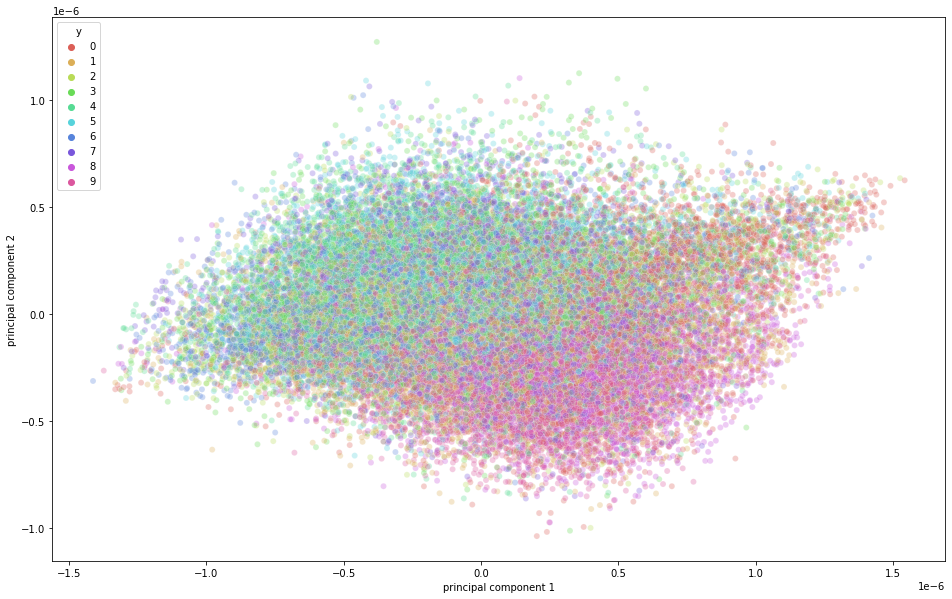

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)

In [ ]:
x_test = x_test/255.0
x_test = x_test.reshape(-1,32,32,3)
x_test_flat = x_test.reshape(-1,3072)
pca = PCA(0.9)
pca.fit(x_train_flat)


PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.n_components_

99

In [ ]:
train_img_pca = pca.transform(x_train_flat)
test_img_pca = pca.transform(x_test_flat)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.optimizers import RMSprop

In [ ]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [ ]:
batch_size = 128
num_classes = 10
epochs = 20

In [ ]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(99,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# to add layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              102400    
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 1,810,698
Trainable params: 1,810,698
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

history = model.fit(train_img_pca, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(test_img_pca, y_test))

Epoch 1/20
391/391 [==============================] - 25s 61ms/step - loss: 2.3028 - accuracy: 0.1007 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/20
391/391 [==============================] - 24s 61ms/step - loss: 2.3027 - accuracy: 0.0972 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/20
391/391 [==============================] - 25s 63ms/step - loss: 2.3027 - accuracy: 0.0954 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/20
391/391 [==============================] - 24s 62ms/step - loss: 2.3026 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/20
391/391 [==============================] - 24s 62ms/step - loss: 2.3027 - accuracy: 0.0963 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/20
391/391 [==============================] - 25s 63ms/step - loss: 2.3027 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/20
391/391 [==============================] - 25s 63ms/step - loss: 2.3026 - accuracy: 0.0966 - val_loss: 2.3026 - val_accuracy:

In [ ]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_flat, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(x_test_flat, y_test))

Epoch 1/20
391/391 [==============================] - 44s 110ms/step - loss: 2.3029 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/20
391/391 [==============================] - 43s 111ms/step - loss: 2.3027 - accuracy: 0.0981 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/20
391/391 [==============================] - 44s 112ms/step - loss: 2.3026 - accuracy: 0.1024 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/20
391/391 [==============================] - 45s 116ms/step - loss: 2.3027 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/20
391/391 [==============================] - 45s 116ms/step - loss: 2.3026 - accuracy: 0.1006 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/20
391/391 [==============================] - 47s 119ms/step - loss: 2.3027 - accuracy: 0.0964 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/20
391/391 [==============================] - 43s 109ms/step - loss: 2.3026 - accuracy: 0.0959 - val_loss: 2.3026 - val_ac